In [72]:
import arrow
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

## Forcing ##

In [2]:
river_flow_file = 'river_flow.csv'
wind_file = 'wind.csv'
tide_file = 'day_avg_tide_pd.csv'

('2013-10-17', 965    2016-06-09
Name: date, dtype: object)


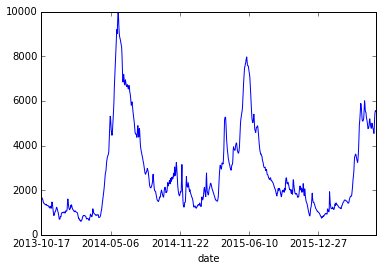

In [24]:
river_flow = pd.read_csv(river_flow_file)
print (river_flow['date'][0], river_flow['date'][-2:-1])
#print (river_flow[0:4])
river_flow = river_flow.set_index('date')
river_flow['RiverFlux'].plot()

('2014-10-19', 553    2016-04-24
Name: datetime, dtype: object)
             day  month  year  hour    u_wind    v_wind
datetime                                               
2014-10-19   NaN    NaN   NaN   NaN       NaN       NaN
2014-10-20   NaN    NaN   NaN   NaN       NaN       NaN
2014-10-21  20.5     10  2014  11.5  3.067492  5.692750
2014-10-22  21.5     10  2014  11.5  3.993009  5.221537


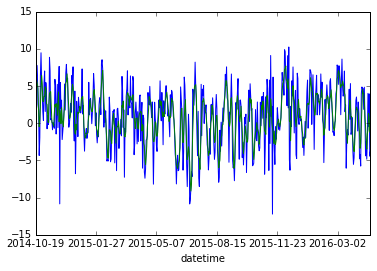

In [115]:
wind = pd.read_csv(wind_file)
print (wind['datetime'][0], wind['datetime'][-2:-1])
wind = wind.set_index(['datetime'])
wind['v_wind'].plot()
low_pass_wind = pd.rolling_mean(wind, 4, center=True)
low_pass_wind['v_wind'].plot()
print (low_pass_wind[0:4])

('2014-09-24', 624    2016-06-09
Name: time, dtype: object)
               depth  gridY  gridX  uVelocity
time                                         
2014-09-24       NaN    NaN    NaN        NaN
2014-09-25       NaN    NaN    NaN        NaN
2014-09-26  9.502433    340    282   0.851677
2014-09-27  9.502433    340    282   0.881380


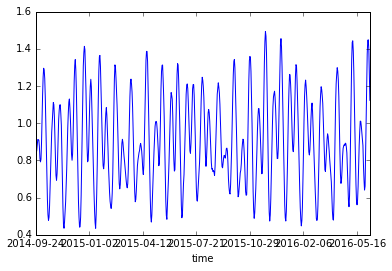

In [121]:
tides = pd.read_csv(tide_file)
print (tides['time'][0], tides['time'][-2:-1])
tides = tides.set_index('time')
low_pass_tide = pd.rolling_mean(tides, 4, center=True)
low_pass_tide['uVelocity'].plot()
print (low_pass_tide[0:4])

### Summary ###
- Winds: Sep 19, 2014 to April 24, 2016
- River: Oct 2013 to June 9, 2016
- Tides: Sep 24, 2014 to June 9, 2016

## Results ##

In [36]:
SB_VictoriaSill = pd.read_csv('SB_VictoriaSill.csv')
SB_VictoriaSillIn = pd.read_csv('SB_VictoriaSillIn.csv')

('2014-11-11T00:00:00+00:00', 502    2016-03-27T00:00:00+00:00
Name: date, dtype: object)
('2014-11-11T00:00:00+00:00', 502    2016-03-27T00:00:00+00:00
Name: date, dtype: object)


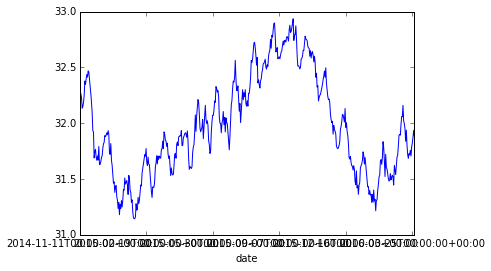

In [37]:
print (SB_VictoriaSill['date'][0], SB_VictoriaSill['date'][-2:-1])
print (SB_VictoriaSillIn['date'][0], SB_VictoriaSillIn['date'][-2:-1])
#print (SB_VictoriaSill[0:4])
SB_VictoriaSill = SB_VictoriaSill.set_index('date')
SB_VictoriaSill['salinity-mean'].plot()

In [8]:
SF_VictoriaSill = pd.read_csv('SF_VictoriaSill.csv')
SF_VictoriaSillIn = pd.read_csv('SF_VictoriaSillIn.csv')
print (SF_VictoriaSill['date'][0], SF_VictoriaSill['date'][-2:-1])
print (SF_VictoriaSillIn['date'][0], SF_VictoriaSillIn['date'][-2:-1])

('2014-10-27T00:00:00+00:00', 502    2016-03-12T00:00:00+00:00
Name: date, dtype: object)
('2014-10-27T00:00:00+00:00', 502    2016-03-12T00:00:00+00:00
Name: date, dtype: object)


('2014-10-27T00:00:00+00:00', 502    2016-03-12T00:00:00+00:00
Name: date, dtype: object)
('2014-10-27T00:00:00+00:00', 502    2016-03-12T00:00:00+00:00
Name: date, dtype: object)


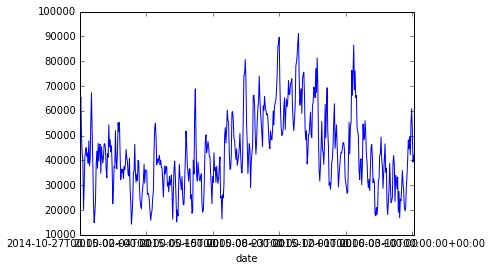

In [38]:
NF_FraserRidge = pd.read_csv('NF_FraserRidge.csv')
NF_FraserRidgeIn = pd.read_csv('NF_FraserRidgeIn.csv')
print (NF_FraserRidge['date'][0], NF_FraserRidge['date'][-2:-1])
print (NF_FraserRidgeIn['date'][0], NF_FraserRidgeIn['date'][-2:-1])
NF_FraserRidge = NF_FraserRidge.set_index('date')
NF_FraserRidge['flux'].plot()

('2014-11-11T00:00:00+00:00', 502    2016-03-27T00:00:00+00:00
Name: date, dtype: object)
('2014-11-11T00:00:00+00:00', 502    2016-03-27T00:00:00+00:00
Name: date, dtype: object)


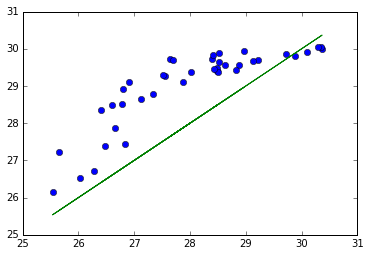

In [107]:
NB_FraserRidge = pd.read_csv('NB_FraserRidge.csv')
NB_FraserRidgeIn = pd.read_csv('NB_FraserRidgeIn.csv')
print (NB_FraserRidge['date'][0], NB_FraserRidge['date'][-2:-1])
print (NB_FraserRidgeIn['date'][0], NB_FraserRidgeIn['date'][-2:-1])
NB_FraserRidgeIn = NB_FraserRidgeIn.set_index('date')
NB_FraserRidge = NB_FraserRidge.set_index('date')
plt.plot(NB_FraserRidge['salinity-mean'][0:40], NB_FraserRidgeIn['salinity-mean'][0:40], 'o')
plt.plot(NB_FraserRidge['salinity-mean'][0:40], NB_FraserRidge['salinity-mean'][0:40])

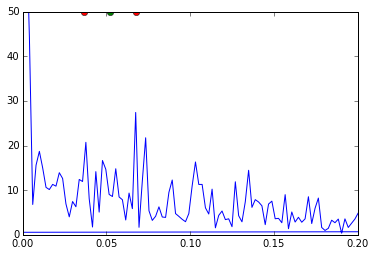

In [48]:
scale = NF_FraserRidge['flux'].mean()
A = np.fft.fft(np.array(NF_FraserRidge['flux']/scale))
omega = np.fft.fftfreq(NF_FraserRidge['flux'].shape[0])
fig, ax = plt.subplots(1,1)
ax.plot(omega, np.absolute(A))
ax.set_xlim((0, 0.2))
ax.set_ylim((0, 50))
ax.plot(1/14.75, 50, 'or')
ax.plot(1/27.5, 50, 'or')
ax.plot(0.5/14.75+0.5/27.5, 50, 'og')

0.66984945997


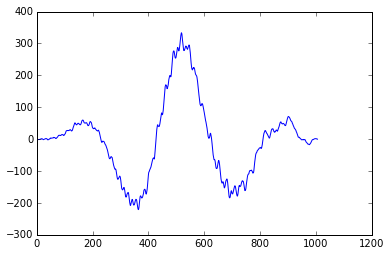

In [69]:
target = NF_FraserRidge['flux'] - NF_FraserRidge['flux'].mean()
target = target/target.std()
#target.plot()

source = SB_VictoriaSill['salinity-mean']
source = source - source.mean()
source = source/source.std()
#source.plot()

print(pd.TimeSeries.corr(target, source))
c1 = np.correlate(target, source, mode='full')
plt.plot(c1)

0   -1.296293
1    0.078230
2    0.632571
3    0.355910
Name: salinity-mean, dtype: float64


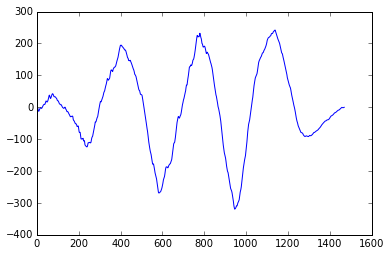

In [108]:
fig, ax = plt.subplots(1,1)
print (target[0:4])

source = river_flow['RiverFlux']
source = source - source.mean()
source = source/source.std()


#pd.TimeSeries.corr(target, source)
c1 = np.correlate(target, source, mode='full')
plt.plot(c1)

In [73]:
test = target.index[0]
print (test)
arrow.get(test).datetime

2014-10-27T00:00:00+00:00


datetime.datetime(2014, 10, 27, 0, 0, tzinfo=tzoffset(None, 0))

In [82]:
target.index = [arrow.get(d).datetime for d in target.index]
source.index = [arrow.get(d).datetime for d in source.index]

In [83]:
print (target[0:4])
print (source[0:4])

2014-10-27 00:00:00+00:00    0.299616
2014-10-28 00:00:00+00:00    1.229201
2014-10-29 00:00:00+00:00    1.460798
2014-10-30 00:00:00+00:00    0.448559
Name: flux, dtype: float64
2013-10-17 00:00:00+00:00   -0.525257
2013-10-18 00:00:00+00:00   -0.542425
2013-10-19 00:00:00+00:00   -0.554075
2013-10-20 00:00:00+00:00   -0.562963
Name: RiverFlux, dtype: float64


0.0297262786878


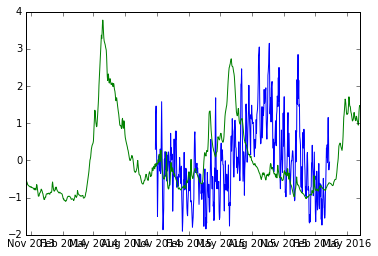

In [84]:
plt.plot(target.index, target)
plt.plot(source.index, source)
print(pd.TimeSeries.corr(target, source))

-0.621510272079


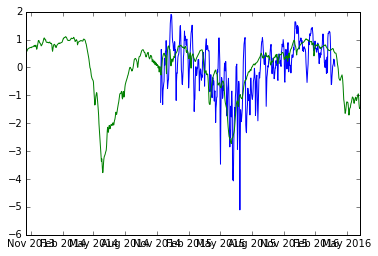

In [114]:
target = NB_FraserRidge['salinity-mean']
target = target - target.mean()
target = target/target.std()
target.index = [arrow.get(d).datetime for d in target.index]

source.index = [arrow.get(d).datetime for d in source.index]

print(pd.TimeSeries.corr(target, source))
#c1 = np.correlate(target, source, mode='full')
#plt.plot(c1)
plt.plot(target.index, target)
plt.plot(source.index, -source)

-0.246244185977


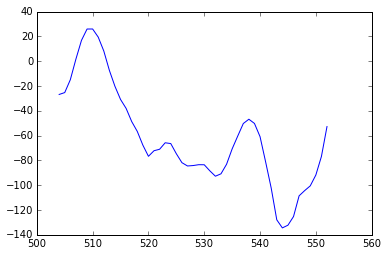

In [125]:
target = NF_FraserRidge['flux'] - NF_FraserRidge['flux'].mean()
target = target/target.std()
target.index = [arrow.get(d).datetime for d in target.index]

source = low_pass_wind['v_wind']
source = source - source.mean()
source = source/source.std()
source.index = [arrow.get(d).datetime for d in source.index]

#plt.plot(target.index, target)
#plt.plot(source.index, -source)

print(pd.TimeSeries.corr(target, source))
c1 = np.correlate(target, source, mode='full')
plt.plot(c1)

0.21445829025


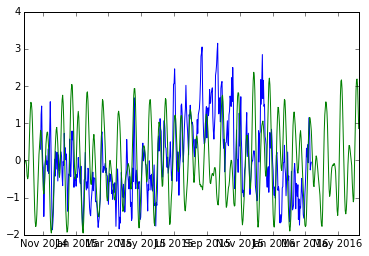

In [126]:
target = NF_FraserRidge['flux'] - NF_FraserRidge['flux'].mean()
target = target/target.std()
target.index = [arrow.get(d).datetime for d in target.index]

source = low_pass_tide['uVelocity']
source = source - source.mean()
source = source/source.std()
source.index = [arrow.get(d).datetime for d in source.index]

plt.plot(target.index, target)
plt.plot(source.index, source)

print(pd.TimeSeries.corr(target, source))
c1 = np.correlate(target, source, mode='full')
#plt.plot(c1)

In [376]:
bigtable = pd.merge(NF_FraserRidge, SB_VictoriaSill, left_index=True, right_index=True)
bigtable.index = [arrow.get(d).datetime for d in bigtable.index]

river_flow.index = [arrow.get(d).datetime for d in river_flow.index]
bigtable = pd.merge(bigtable, river_flow, left_index=True, right_index=True)

low_pass_wind.index = [arrow.get(d).datetime for d in low_pass_wind.index]
bigtable = pd.merge(bigtable, low_pass_wind, left_index=True, right_index=True)

low_pass_tide.index = [arrow.get(d).datetime for d in low_pass_tide.index]
bigtable = pd.merge(bigtable, low_pass_tide, left_index=True, right_index=True)

bigtable = bigtable.drop(['longitude-mean', 'longitude-std', 'depth-mean_x',
                         'depth-stdev_x', 'salinity-mean_x',
                          'salinity-std_x', 'age-mean_x',
                         'age-stdev_x', 'latitude-mean', 'latitude-std',
                         'depth-mean_y', 'depth-stdev_y', 'salinity-std_y',
                         'age-mean_y', 'age-stdev_y', 'Unnamed: 0',
                         'year_x', 'month_x', 'day_x', 'day_y',
                         'month_y', 'year_y', 'hour', 'depth', 'gridY',
                         'gridX'], 1)


NB_FraserRidge.index = [arrow.get(d).datetime for d in NB_FraserRidge.index]
NF_FraserRidge.index = [arrow.get(d).datetime for d in NF_FraserRidge.index]

bigtable = pd.merge(bigtable, NB_FraserRidge, left_index=True, right_index=True)

bigtable = bigtable.drop(['longitude-mean', 'longitude-std', 'depth-mean',
                         'depth-stdev', 'salinity-std', 'age-mean',
                         'age-stdev', 'flux'], 1)

bigtable['flux_x'] = pd.rolling_mean(bigtable['flux_x'], 4, center=True)
bigtable['salinity-mean_y'] = pd.rolling_mean(bigtable['salinity-mean_y'], 4, center=True)
bigtable['flux_y'] = pd.rolling_mean(bigtable['flux_y'], 4, center=True)
bigtable['RiverFlux'] = pd.rolling_mean(bigtable['RiverFlux'], 4, center=True)
bigtable['salinity-mean'] = pd.rolling_mean(bigtable['salinity-mean'], 4, center=True)
                                        
print (bigtable[0:4])


                                flux_x  salinity-mean_y        flux_y  \
2014-11-11 00:00:00+00:00          NaN              NaN           NaN   
2014-11-12 00:00:00+00:00          NaN              NaN           NaN   
2014-11-13 00:00:00+00:00  50454.04990        32.274586  25126.861125   
2014-11-14 00:00:00+00:00  53783.46415        32.227198  26972.916125   

                            RiverFlux    u_wind    v_wind  uVelocity  \
2014-11-11 00:00:00+00:00         NaN -1.832188  3.987521   0.988770   
2014-11-12 00:00:00+00:00         NaN -1.768250  4.147466   0.844197   
2014-11-13 00:00:00+00:00  3025.80300 -1.612421  4.240079   0.675114   
2014-11-14 00:00:00+00:00  2872.83775 -0.908232  2.105137   0.546213   

                           salinity-mean  
2014-11-11 00:00:00+00:00            NaN  
2014-11-12 00:00:00+00:00            NaN  
2014-11-13 00:00:00+00:00      27.337083  
2014-11-14 00:00:00+00:00      27.632950  


In [304]:
for iday in np.arange(-14, 15, 1):
    print(iday, pd.TimeSeries.corr(bigtable['flux_x'], 
                         bigtable['salinity-mean_y'].shift(freq=datetime.timedelta(days=iday))))

(-14, 0.64217398663913228)
(-13, 0.64502952952215509)
(-12, 0.64347437577919586)
(-11, 0.63917727545822778)
(-10, 0.63443894736852335)
(-9, 0.6322408101927165)
(-8, 0.63408063448343066)
(-7, 0.64110676031018887)
(-6, 0.6529229813209656)
(-5, 0.66810888056833406)
(-4, 0.68475018366478702)
(-3, 0.70105550420100593)
(-2, 0.7152878423206267)
(-1, 0.72561056386038725)
(0, 0.73082183288655767)
(1, 0.72929197010169033)
(2, 0.72142686512149024)
(3, 0.70810711238596891)
(4, 0.6913200417710087)
(5, 0.67481576968943846)
(6, 0.66002683574855703)
(7, 0.64842933347326259)
(8, 0.63915609563832254)
(9, 0.63277764565704775)
(10, 0.63031345583174103)
(11, 0.63102615663464001)
(12, 0.63495612744524077)
(13, 0.6404465236142538)
(14, 0.64626560774397224)


In [305]:
pd.ols(y=bigtable['flux_x'], x=bigtable.drop(['flux_x', 'flux_y', 'RiverFlux',
                                             'u_wind', 'v_wind', 'uVelocity',
                                             'salinity-mean'], 1))


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <salinity-mean_y> + <intercept>

Number of Observations:         486
Number of Degrees of Freedom:   2

R-squared:         0.5341
Adj R-squared:     0.5331

Rmse:           9585.8556

F-stat (1, 484):   554.8508, p-value:     0.0000

Degrees of Freedom: model 1, resid 484

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
salinity-mean_y 23056.5766   978.8288      23.56     0.0000 21138.0722 24975.0810
     intercept -694059.1877 31303.6535     -22.17     0.0000 -755414.3486 -632704.0268
---------------------------------End of Summary---------------------------------

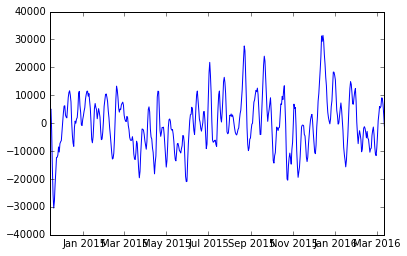

In [306]:
intercept = -694059.1877
a1 = 23056.5766
remainder = bigtable['flux_x'] - (intercept + a1*bigtable['salinity-mean_y'])
plt.plot(bigtable.index, remainder)
bigtable['remainder'] = remainder

In [273]:
for iday in np.arange(-14, 15, 1):
    print(iday, pd.TimeSeries.corr(bigtable['remainder'], 
                         bigtable['uVelocity'].shift(freq=datetime.timedelta(days=iday))))

(-14, 0.24982842012352707)
(-13, 0.28632212074101637)
(-12, 0.27541915226235869)
(-11, 0.21577296818243832)
(-10, 0.11733379168711945)
(-9, 0.001305492399031889)
(-8, -0.10794718914577199)
(-7, -0.18927097757318051)
(-6, -0.2268852766847923)
(-5, -0.21608556869966952)
(-4, -0.16143700296021452)
(-3, -0.075087471263215341)
(-2, 0.023777933163919882)
(-1, 0.11605702022266731)
(0, 0.18615967899004673)
(1, 0.22255111961552643)
(2, 0.22305781898546423)
(3, 0.19212393915347675)
(4, 0.13748136563084415)
(5, 0.071678191797511573)
(6, 0.008516073484714979)
(7, -0.040412638873197987)
(8, -0.067232057680119056)
(9, -0.068216153358952286)
(10, -0.042927153223821964)
(11, 0.0059137536546505463)
(12, 0.07345398489312828)
(13, 0.15092035938337178)
(14, 0.22634778095443012)


In [274]:
bigtable['uVelocity'] = bigtable['uVelocity'].shift(freq=datetime.timedelta(days=-6))


In [275]:
pd.ols(y=bigtable['remainder'], x=bigtable.drop(['flux_x', 'flux_y', 'RiverFlux',
                                             'u_wind', 'v_wind', 'salinity-mean_y',
                                             'salinity-mean', 'remainder'], 1))


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <uVelocity> + <intercept>

Number of Observations:         481
Number of Degrees of Freedom:   2

R-squared:         0.0515
Adj R-squared:     0.0495

Rmse:           9361.2084

F-stat (1, 479):    25.9956, p-value:     0.0000

Degrees of Freedom: model 1, resid 479

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
     uVelocity -8894.1110  1744.4255      -5.10     0.0000 -12313.1850 -5475.0370
     intercept  8121.5772  1659.6638       4.89     0.0000  4868.6362 11374.5181
---------------------------------End of Summary---------------------------------

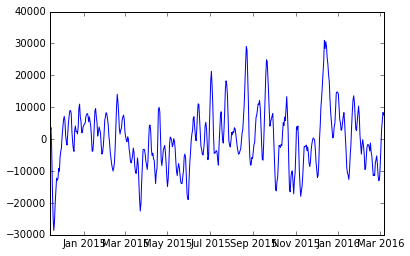

In [276]:
intercept = 8121.5772
a1 = -8894.1110
remainder = bigtable['remainder'] - (intercept + a1*bigtable['uVelocity'])
plt.plot(bigtable.index, remainder)
bigtable['remainder2'] = remainder

In [282]:
for iday in np.arange(-14, 15, 1):
    print(iday, pd.TimeSeries.corr(bigtable['remainder2'], 
                         bigtable['v_wind'].shift(freq=datetime.timedelta(days=iday))))

(-14, -0.062150992886502304)
(-13, -0.058378397586091937)
(-12, -0.04113498501306119)
(-11, -0.015548931207542077)
(-10, 0.011496776364544084)
(-9, 0.031339993051781215)
(-8, 0.036816782264703085)
(-7, 0.028620684435867582)
(-6, 0.0044901223644996094)
(-5, -0.034173281765533747)
(-4, -0.084269883913010643)
(-3, -0.1270837163068059)
(-2, -0.15319880889220486)
(-1, -0.1576465065246809)
(0, -0.13195463617696884)
(1, -0.10113729259168688)
(2, -0.073665562315795088)
(3, -0.05119471968742783)
(4, -0.038866514120406183)
(5, -0.017831593770142859)
(6, 0.02031972744046355)
(7, 0.070651146717166477)
(8, 0.12546461055384892)
(9, 0.17427159829427877)
(10, 0.20569690255568177)
(11, 0.21782572265486622)
(12, 0.21384013220027792)
(13, 0.19135536044191878)
(14, 0.15631216122509237)


In [283]:
bigtable['v_wind'] = bigtable['v_wind'].shift(freq=datetime.timedelta(days=-1))

In [284]:
pd.ols(y=bigtable['remainder2'], x=bigtable.drop(['flux_x', 'flux_y', 'RiverFlux',
                                             'u_wind', 'uVelocity', 'salinity-mean_y',
                                             'salinity-mean', 'remainder', 'remainder2'], 1))


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <v_wind> + <intercept>

Number of Observations:         481
Number of Degrees of Freedom:   2

R-squared:         0.0249
Adj R-squared:     0.0228

Rmse:           9244.1522

F-stat (1, 479):    12.2077, p-value:     0.0005

Degrees of Freedom: model 1, resid 479

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
        v_wind  -513.3878   146.9361      -3.49     0.0005  -801.3826  -225.3930
     intercept   402.3176   436.9423       0.92     0.3576  -454.0893  1258.7245
---------------------------------End of Summary---------------------------------

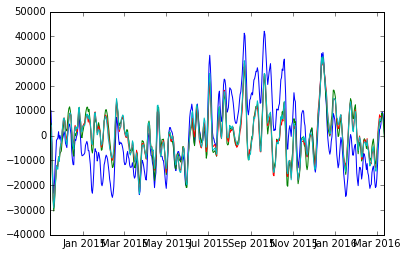

In [285]:
intercept = -513.3878
a1 = 402.3176
remainder = bigtable['remainder2'] - (intercept + a1*bigtable['v_wind'])
plt.plot(bigtable.index, bigtable['flux_x']-bigtable['flux_x'].mean())
plt.plot(bigtable.index, bigtable['remainder'])
plt.plot(bigtable.index, bigtable['remainder2'])

plt.plot(bigtable.index, remainder)

bigtable['remainder3'] = remainder

In [290]:
def scalit(x):
    x = x - x.mean()
    x = x/x.std()
    return x

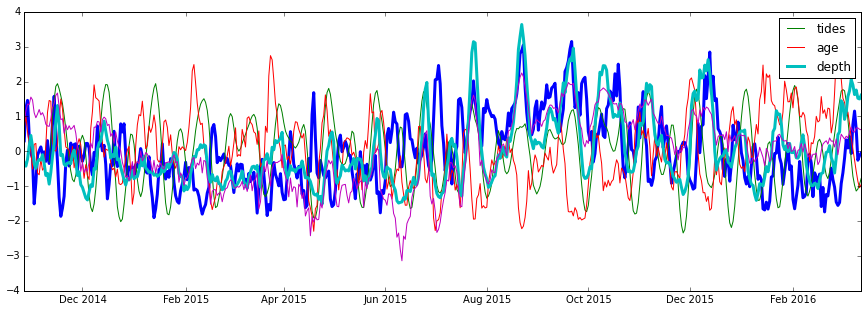

In [389]:
fig, ax = plt.subplots(1, 1, figsize=(15,5))
#ax.plot(bigtable.index, scalit(bigtable['remainder']), linewidth=2)
ax.plot(NF_FraserRidge.index, scalit(NF_FraserRidge['flux']), linewidth=3)
ax.plot(bigtable.index + datetime.timedelta(days=0), -scalit(bigtable['uVelocity']), label='tides')
#ax.plot(bigtable.index + datetime.timedelta(days=0), bigtable['v_wind']/4.)
#ax.plot(bigtable.index, -scalit(bigtable['RiverFlux']))
ax.plot(NF_FraserRidge.index, scalit(NF_FraserRidge['age-mean']), label='age')
ax.plot(NF_FraserRidge.index, scalit(NF_FraserRidge['depth-mean']), linewidth=3, label='depth')
ax.plot(NF_FraserRidge.index, scalit(NF_FraserRidge['salinity-mean']))
#ax.set_xlim(datetime.datetime(day=1, year=2015, month=7))
ax.legend()

In [ ]:
# Seasonal variation is due to salinity variation at Victoria Sill
# Short term variations are due to tides and wind but correlation isn't particularly good due
# to timing flex.
# Big pulses correlate to wind shifts to south in sink with tides

# Things are going in and out of phase due to differences in age